# Data Exploration

My objective of this visualization is to provide an intuitive perception of how the wages of employees (maybe more interested in Information Technology related fields) have been changing over time. The dataset that I will depend on will (primary) be **National Employment, Hours, and Earnings** [(link to Kaggle)](https://www.kaggle.com/bls/employment#ce.series.csv) provided by _Current Employment Statistics (CES)_.

For the purpose of the visualization, I would have to explore around the data, understand the dataset. This notebook exposes these steps...

The result of the purpose of **assignment 1**, please refers to the very end of this notebook [**6.4 Polish the Plots (Completed Section for Assignment 1)**](#6.4-Polish-the-Plots-(Completed-Section-for-Assignment-1))

-Grayson (guw16@pitt.edu)

---

## 1. The CE Dataset

In [1]:
# Create some helper functions... gotta be handy, 
#      this is a huge dataset involving hundreds of separated files.

import requests
import os

def download_ce(filename, dst='./ce_data/'):
    """
    Download from https://download.bls.gov/pub/time.series/ce/
    """
    url = f'https://download.bls.gov/pub/time.series/ce/{filename}'
    
    print('downloading from', url)
    r = requests.get(url)
    f = dst+filename
    print('save to', f)
    
    raw = r.content #.decode().replace('\t', ' ')
    open(f, 'wb').write(raw)
    
import pandas as pd
def load_ce(filename, dst='./ce_data/', force_download=False, **kargs):
    """
    Load ce file as DataFrame, if not exist, download from ce
    """
    f = dst+filename
    if force_download or not os.path.exists(f):
        download_ce(filename, dst)
   
    # return open(f, 'r').read()
    # return f
    return pd.read_csv(f, sep=r' *\t *', engine='python', **kargs)

In [239]:
# Make sure the directory exists for holding all data files
%mkdir ce_data
open('ce_data/touch', 'w').write('');

mkdir: ce_data: File exists


In [3]:
df_50a = load_ce('ce.data.50a.Information.Employment', force_download=True)
df_50a.head()

downloading from https://download.bls.gov/pub/time.series/ce/ce.data.50a.Information.Employment
save to ./ce_data/ce.data.50a.Information.Employment


,series_id,year,period,value,footnote_codes
0,CES5000000001,1939,M01,1112.0,None
1,CES5000000001,1939,M02,1118.0,None
2,CES5000000001,1939,M03,1126.0,None
3,CES5000000001,1939,M04,1127.0,None
4,CES5000000001,1939,M05,1125.0,None


In [4]:
df_50b = load_ce('ce.data.50b.Information.AllEmployeeHoursAndEarnings')
df_50b.head()

,series_id,year,period,value,footnote_codes
0,CES5000000002,2006,M03,36.4,None
1,CES5000000002,2006,M04,36.4,None
2,CES5000000002,2006,M05,36.5,None
3,CES5000000002,2006,M06,36.5,None
4,CES5000000002,2006,M07,36.4,None


In [5]:
df_50b.year.unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [6]:
df_50c = load_ce('ce.data.50c.Information.ProductionEmployeeHoursAndEarnings')
df_50c.head()

,series_id,year,period,value,footnote_codes
0,CES5000000007,1964,M01,38.0,None
1,CES5000000007,1964,M02,37.9,None
2,CES5000000007,1964,M03,38.1,None
3,CES5000000007,1964,M04,38.3,None
4,CES5000000007,1964,M05,38.2,None


In [7]:
df_50c[ df_50c['year'] == 1964 ].series_id.unique()

array(['CES5000000007', 'CES5000000008', 'CES5000000030', 'CES5000000031',
       'CES5000000032', 'CES5000000034', 'CES5000000035', 'CES5000000081',
       'CES5000000082', 'CEU5000000007', 'CEU5000000008', 'CEU5000000030',
       'CEU5000000031', 'CEU5000000032', 'CEU5000000034', 'CEU5000000035',
       'CEU5000000081', 'CEU5000000082'], dtype=object)

**Alright... But what're the meanings of these `CES5000000032` ids?**

In [8]:
_df_series = load_ce('ce.series')
def get_meaning_series(series_id):
    return _df_series[ _df_series['series_id'] == series_id ]

In [9]:
get_meaning_series('CES5000000007')

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7364,CES5000000007,50,50000000,7,S,Average weekly hours of production and nonsupe...,NaN,1964,M01,2019,M09


**And `supersector_code`? `industry_code`? `data_type_code`?**

In [10]:
_df_supersector = load_ce('ce.supersector')
_df_industry = load_ce('ce.industry')
_df_datatype = load_ce('ce.datatype')

def get_meaning_supersector(code):
    return _df_supersector[ _df_supersector['supersector_code'] == code ].supersector_name.iloc[0]
def get_meaning_industry(code):
    return _df_industry[ _df_industry['industry_code'] == code ]
def get_meaning_datatype(code):
    return _df_datatype[ _df_datatype['data_type_code'] == code ]

In [11]:
arr = df_50c[ df_50c['year'] == 1964 ].series_id.unique()
print('len', len(arr))
arr

len 18


array(['CES5000000007', 'CES5000000008', 'CES5000000030', 'CES5000000031',
       'CES5000000032', 'CES5000000034', 'CES5000000035', 'CES5000000081',
       'CES5000000082', 'CEU5000000007', 'CEU5000000008', 'CEU5000000030',
       'CEU5000000031', 'CEU5000000032', 'CEU5000000034', 'CEU5000000035',
       'CEU5000000081', 'CEU5000000082'], dtype=object)

In [12]:
arr = df_50c[ df_50c['year'] == 2018 ].series_id.unique()
print('len', len(arr))
arr[:30]

len 234


array(['CES5000000007', 'CES5000000008', 'CES5000000030', 'CES5000000031',
       'CES5000000032', 'CES5000000034', 'CES5000000035', 'CES5000000081',
       'CES5000000082', 'CES5051100007', 'CES5051100008', 'CES5051100030',
       'CES5051100031', 'CES5051100032', 'CES5051100034', 'CES5051100035',
       'CES5051100081', 'CES5051100082', 'CES5051110007', 'CES5051110008',
       'CES5051110030', 'CES5051110031', 'CES5051110032', 'CES5051110034',
       'CES5051110035', 'CES5051110081', 'CES5051110082', 'CES5051111007',
       'CES5051111008', 'CES5051111030'], dtype=object)

**Interesting, looks like there're new `series` gained over time**

In [13]:
df = get_meaning_series(arr[15])
df

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7397,CES5051100035,50,50511000,35,S,Indexes of aggregate weekly payrolls of produc...,I,2003,M01,2019,M08


In [14]:
print(df.industry_code.iloc[0])
get_meaning_industry(df.industry_code.iloc[0]) 

50511000


,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
520,50511000,511,A,"Publishing industries, except Internet",4,T,521


In [15]:
print(df.data_type_code.iloc[0])
get_meaning_datatype(df.data_type_code.iloc[0])

35


,data_type_code,data_type_text
28,35,INDEXES OF AGGREGATE WEEKLY PAYROLLS OF PRODUC...


In [16]:
print(df.supersector_code.iloc[0])
get_meaning_supersector(df.supersector_code.iloc[0]) 

50


'Information'

## 2. Find Data of Interest

Looks like `ce.series` contains interesting stuff which allows me to find value (indexed by `series_id`) filtered with supersector, industry type, time span and etc. Should be a good start.

But to begin with, I would first like to know what are some `industries` in the `Information` supersector.

In [17]:
arr = df_50c[ df_50c['year'] == 2019 ].series_id.unique()
len(arr)

234

In [18]:
df = pd.concat([(get_meaning_series(s)) for s in arr[1:]])
df.head(3)

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7365,CES5000000008,50,50000000,8,S,Average hourly earnings of production and nons...,NaN,1964,M01,2019,M09
7372,CES5000000030,50,50000000,30,S,Average weekly earnings of production and nons...,NaN,1964,M01,2019,M09
7373,CES5000000031,50,50000000,31,S,Average weekly earnings of production and nons...,NaN,1964,M01,2019,M09


In [19]:
df.industry_code.unique()

array([50000000, 50511000, 50511100, 50511110, 50511120, 50511200,
       50512000, 50515000, 50515110, 50517000, 50517300, 50518000,
       50519000])

In [20]:
df_industries_2019 = pd.concat([get_meaning_industry(i) for i in df.industry_code.unique()])
print(len(df_industries_2019))
df_industries_2019

13


,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
519,50000000,51,A,Information,2,T,520
520,50511000,511,A,"Publishing industries, except Internet",4,T,521
521,50511100,5111,A,"Newspaper, book, and directory publishers",5,T,522
522,50511110,51111,A,Newspaper publishers,6,T,523
523,50511120,51112,A,Periodical publishers,6,T,524
526,50511200,5112,A,Software publishers,5,T,527
527,50512000,512,A,Motion picture and sound recording industries,4,T,528
530,50515000,515,A,"Broadcasting, except Internet",4,T,531
532,50515110,51511,A,Radio broadcasting,6,T,533
535,50517000,517,A,Telecommunications,4,T,536


Or, find all the industry that has ever existed in the supersection 50 (Information)

In [21]:
_df_series.head(3)

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
0,CES0000000001,0,0,1,S,"All employees, thousands, total nonfarm, seaso...",NaN,1939,M01,2019,M09
1,CES0000000010,0,0,10,S,"Women employees, thousands, total nonfarm, sea...",NaN,1964,M01,2019,M09
2,CES0000000025,0,0,25,S,"All employees, quarterly averages, seasonally ...",NaN,1939,M03,2019,M09


In [22]:
arr = _df_series[ _df_series.supersector_code == 50 ].industry_code.unique()
arr

array([50000000, 50511000, 50511100, 50511110, 50511120, 50511130,
       50511190, 50511200, 50512000, 50512110, 50512130, 50515000,
       50515100, 50515110, 50515120, 50515200, 50517000, 50517300,
       50517311, 50517312, 50517900, 50517911, 50518000, 50519000,
       50519130, 50519190])

In [23]:
df_industries_all = pd.concat([get_meaning_industry(i) for i in arr])
print(len(df_industries_all))
df_industries_all

26


,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
519,50000000,51,A,Information,2,T,520
520,50511000,511,A,"Publishing industries, except Internet",4,T,521
521,50511100,5111,A,"Newspaper, book, and directory publishers",5,T,522
522,50511110,51111,A,Newspaper publishers,6,T,523
523,50511120,51112,A,Periodical publishers,6,T,524
524,50511130,51113,E,Book publishers,6,T,525
525,50511190,"51114,9",C,"Directory, mailing list, and other publishers",6,T,526
526,50511200,5112,A,Software publishers,5,T,527
527,50512000,512,A,Motion picture and sound recording industries,4,T,528
528,50512110,51211,C,Motion picture and video production,6,T,529


In [24]:
print(f"There's {len(df_industries_all) - len(df_industries_2019)} industries not in the 2019 stats.")

There's 13 industries not in the 2019 stats.


**OK, with all these industies in the Infomation supersector, what kind of data we have from the whole dataset provide?**

According to the `ce.txt`:

          

          a - Employment - includes all employment datatypes                                 
                      (Datatype codes shown in parentheses):                                  

                  *  All employees (01)                                                       
                  *  Production or nonsupervisory employees (06)                              
                  *  Women employees (10)                                                     
                  *  1-month diffusion index (21)                                             
                  *  3-month diffusion index (22)                                             
                  *  6-month diffusion index (23)                                             
                  *  12-month diffusion index (24)                                            
                  *  All employee quarterly average (25)                                      
                  *  3-month moving average change (26)                                       

           b - Hours and earnings of all employees - includes all hours and earnings          
                     datatypes for all employee payroll: (Data type numbers shown in          
                     parentheses)                                                             

                  *  Average weekly hours for all employees (02)                              
                  *  Average hourly earnings for all employees (03)                           
                  *  Average overtime hours of all employees (04)                             
                  *  Average weekly earnings of all employees (11)                            
                  *  Average weekly earnings of all employees $82-84 (12)                  
                  *  Average hourly earnings of all employees $82-84 (13)                     
                  *  Average hourly earnings of all employees excluding overtime (15)         
                  *  Index of aggregate weekly hours of all employees, 2007=100 (16)          
                  *  Index of aggregate weekly payrolls of all employees, 2007=100 (17)       
                  *  Quarterly average weekly hours of all employees (19)                     
                  *  Quarterly average weekly overtime hours of all employees (20)            
                  *  Aggregate weekly hours of all employees (56)                             
                  *  Aggregate weekly payrolls of all employees (57)                          
                  *  Aggregate weekly overtime hours of all employees (58)                    

            c - Production employee hours and earnings - includes all hours and               
                     earnings data types for production or nonsupervisory                     
                     employees: (Data type numbers shown in parentheses)                      

                  *  Average weekly hours for production employees (07)                       
                  *  Average hourly earnings for production employees (08)                    
                  *  Average weekly overtime hours of production employees (09)               
                  *  Average weekly earnings of production employees (30)                     
                  *  Average weekly earnings of production employees, $82-84 (31)             
                  *  Average hourly earnings of production employees, $82-84 (32)             
                  *  Average hourly earnings of production employees excluding                
                     overtime (33)                                                            
                  *  Index of aggregate hours of production employees, 2002=100 (34)          
                  *  Index of aggregate payrolls of production employees, 2002=100 (35)       
                  *  Quarterly average weekly hours of production employees  (36)             
                  *  Quarterly average weekly overtime hours of production                    
                     employees (37)                                                           
                  *  Aggregate weekly hours of production employees (81)                      
                  *  Aggregate weekly payrolls of production employees (82)                   
                  *  Aggregate weekly overtime hours of production employees (83)  
                  
             

**Let's see the employee numbers of all time**

Which is `data_type_code == 01`

In [25]:
df_50a.head()

,series_id,year,period,value,footnote_codes
0,CES5000000001,1939,M01,1112.0,None
1,CES5000000001,1939,M02,1118.0,None
2,CES5000000001,1939,M03,1126.0,None
3,CES5000000001,1939,M04,1127.0,None
4,CES5000000001,1939,M05,1125.0,None


In [26]:
df_series = pd.concat([get_meaning_series(i) for i in df_50a.series_id.unique()])
# filter where the data_type_code is 01
df_series_filtered = df_series[ df_series.data_type_code == 1 ]
# industry_code == 50511200, Software publishers
df_series_filtered = df_series_filtered[ df_series_filtered.industry_code == 50511200 ]
df_series_filtered.head()

,series_id,supersector_code,industry_code,data_type_code,seasonal,series_title,footnote_codes,begin_year,begin_period,end_year,end_period
7477,CES5051120001,50,50511200,1,S,"All employees, thousands, software publishers,...",I,1990,M01,2019,M08
20483,CEU5051120001,50,50511200,1,U,"All employees, thousands, software publishers,...",NaN,1990,M01,2019,M08


In [27]:
df_value = df_50a[ df_50a.series_id.isin(df_series_filtered.series_id) ]
print(len(df_value), len(df_50a))

741 47430


In [28]:
# Drop 2019 data (because the we have incomplete data on 2019)
df_value = df_value[ df_value.year < 2019 ]
df_value.tail()

,series_id,year,period,value,footnote_codes
31716,CEU5051120001,2018,M09,415.2,None
31717,CEU5051120001,2018,M10,413.9,None
31718,CEU5051120001,2018,M11,417.8,None
31719,CEU5051120001,2018,M12,417.9,None
31720,CEU5051120001,2018,M13,407.9,None


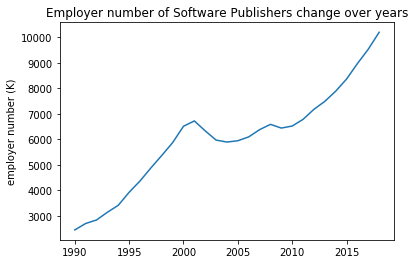

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(df_value.groupby('year').agg('sum'))
plt.title('Employer number of Software Publishers change over years')
plt.ylabel('employer number (K)')
plt.show()

## 3. Wrap Some Handy Functions

At this point, I guess it's a good time to make some common step. So that I can dig more upon what we have here.

### 3.1 Show Involved Industries from Series

In [30]:
def get_included_industries(series_ids):
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return pd.concat([get_meaning_industry(i) for i in _df.industry_code.unique()])

In [31]:
get_included_industries(load_ce('ce.data.10a.MiningAndLogging.Employment').series_id.unique()) \
    .head()

,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
5,10000000,-,A,Mining and logging,2,T,6
6,10113300,1133,A,Logging,5,T,7
7,10210000,21,A,Mining,3,T,8
8,10211000,211,A,Oil and gas extraction,4,T,9
9,10212000,212,A,"Mining, except oil and gas",4,T,10


In [32]:
get_included_industries(load_ce('ce.data.20a.Construction.Employment').series_id.unique()) \
    .head()

,industry_code,naics_code,publishing_status,industry_name,display_level,selectable,sort_sequence
23,20000000,23,A,Construction,2,T,24
24,20236000,236,A,Construction of buildings,4,T,25
25,20236100,2361,A,Residential building,5,T,26
26,20236115,236115,A,New single-family general contractors,7,T,27
27,20236116,236116,B,New multifamily general contractors,7,T,28


### 3.2 Filters from Series, `data_type`, `industry_code`

e.g. 

**Industry**: Coal mining (`industry_code = 10212100`)

**Interested Data**: Average hourly earnings for production employees (`data_type_code == 08`)                                             

In [33]:
def filter_datatype_from_seriesids(datatype_code, series_ids):
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return _df[ _df.data_type_code == datatype_code ].series_id.to_list()

def filter_industry_from_seriesids(industry_code, series_ids):
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return _df[ _df.industry_code == industry_code ].series_id.to_list()

In [34]:
df_30c = load_ce('ce.data.10c.MiningAndLogging.ProductionEmployeeHoursAndEarnings')
arr_s = df_30c.series_id.unique()
arr_s = filter_datatype_from_seriesids(8, arr_s)
arr_s = filter_industry_from_seriesids(10212100, arr_s)
df_30c[ df_30c.series_id.isin(arr_s) ].head()

,series_id,year,period,value,footnote_codes
27881,CES1021210008,1985,M01,16.53,None
27882,CES1021210008,1985,M02,16.84,None
27883,CES1021210008,1985,M03,16.84,None
27884,CES1021210008,1985,M04,16.90,None
27885,CES1021210008,1985,M05,16.82,None


## 4. Make Sense of the Data

**Plot every industry as a single line, still use `data_type==8`**

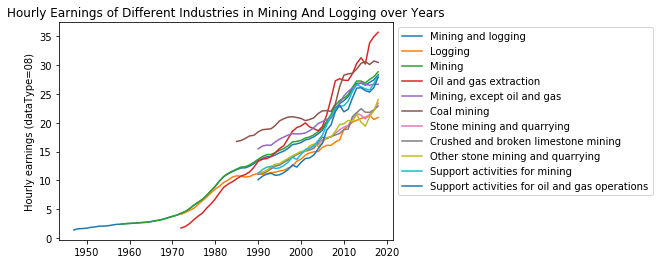

In [35]:
# Example: Plot every industry as a single line, still use data_type==8
%matplotlib inline

df_30c = load_ce('ce.data.10c.MiningAndLogging.ProductionEmployeeHoursAndEarnings')
arr_s = df_30c.series_id.unique()
arr_filtered = filter_datatype_from_seriesids(8, arr_s)

industries_map = {}
industries_list = get_included_industries(df_30c.series_id.unique()).industry_code.to_list()
industries_names = [get_meaning_industry(i).industry_name.iloc[0] for i in industries_list]

for industry_code in industries_list:
    # print(industry_code)
    arr_s = filter_industry_from_seriesids(industry_code, arr_filtered)
    df = df_30c[ df_30c.series_id.isin(arr_s) ]
    # Drop incomplete stats
    df = df[ df.year<2019 ]
    industries_map[industry_code] = df.groupby('year').agg('mean')
    
    # Multiple line plot
    plt.plot(
        industries_map[industry_code].index, 
        industries_map[industry_code].value,
        #marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4
    )

plt.legend(industries_names, bbox_to_anchor=(1, 1))
plt.ylabel('Hourly earnings (dataType=08)')
plt.title('Hourly Earnings of Different Industries in Mining And Logging over Years')
plt.show()

**Looks good, at least good enough for making some sense of the data**

Wrap as a function so that we can see more...

In [36]:
def show_datatype_over_year(from_ce_df, datatype):
    datatype_text = get_meaning_datatype(datatype).data_type_text.iloc[0]
    print(f'datatype={datatype} is {datatype_text}')
    
    arr_s = from_ce_df.series_id.unique()
    # Filter all the series that belongs to the specified datatype 
    arr_filtered = filter_datatype_from_seriesids(datatype, arr_s)

    industries_map = {}
    industries_list = get_included_industries(from_ce_df.series_id.unique()).industry_code.to_list()
    print(f'There are {len(industries_list)} industies')
    industries_names = [get_meaning_industry(i).industry_name.iloc[0] for i in industries_list]

    for industry_code in industries_list:
        # print(industry_code)
        arr_s = filter_industry_from_seriesids(industry_code, arr_filtered)
        df = from_ce_df[ from_ce_df.series_id.isin(arr_s) ]
        # Drop incomplete stats
        df = df[ df.year<2019 ]
        industries_map[industry_code] = df.groupby('year').agg('mean')

        # Multiple line plot
        plt.plot(
            industries_map[industry_code].index, 
            industries_map[industry_code].value,
            #marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4
        )

    plt.legend(industries_names, bbox_to_anchor=(1, 1))
    plt.ylabel(f'{datatype_text} (dataType={datatype})')
    plt.title(f'{datatype_text} of Different Industries over Years')
    plt.show()

Now... mess the function!

See **WholesaleTrade** AVERAGE HOURLY EARNINGS

datatype=8 is AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
There are 44 industies


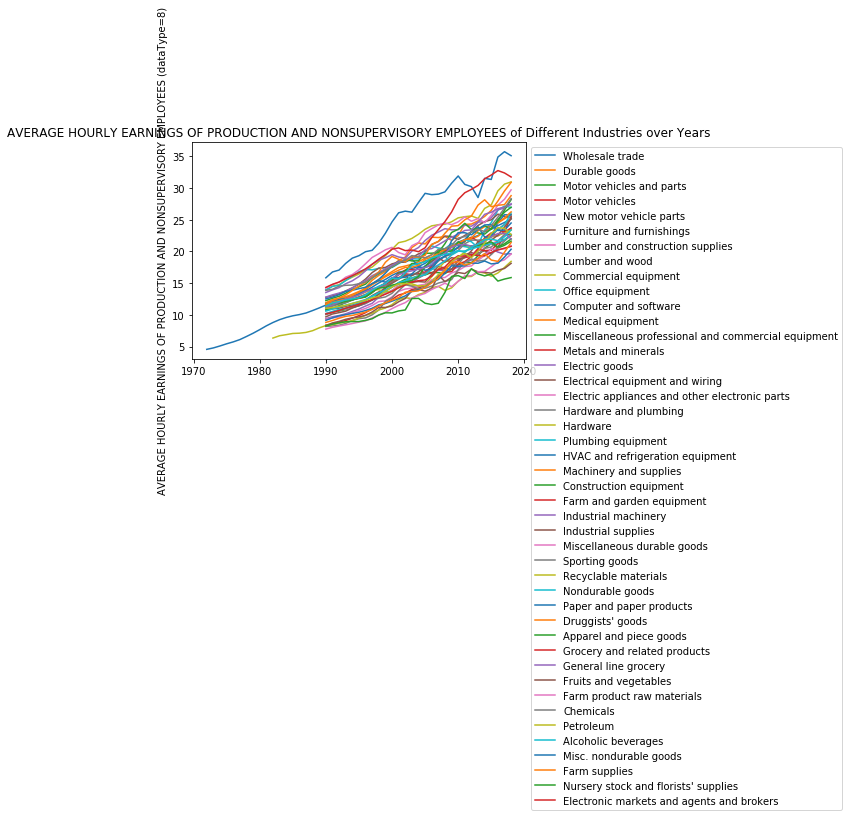

In [37]:
%matplotlib inline
show_datatype_over_year(
    load_ce('ce.data.41c.WholesaleTrade.ProductionEmployeeHoursAndEarnings'),
    8
)

Let find out AVERAGE HOURLY EARNINGS in **Information**

datatype=8 is AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
There are 13 industies


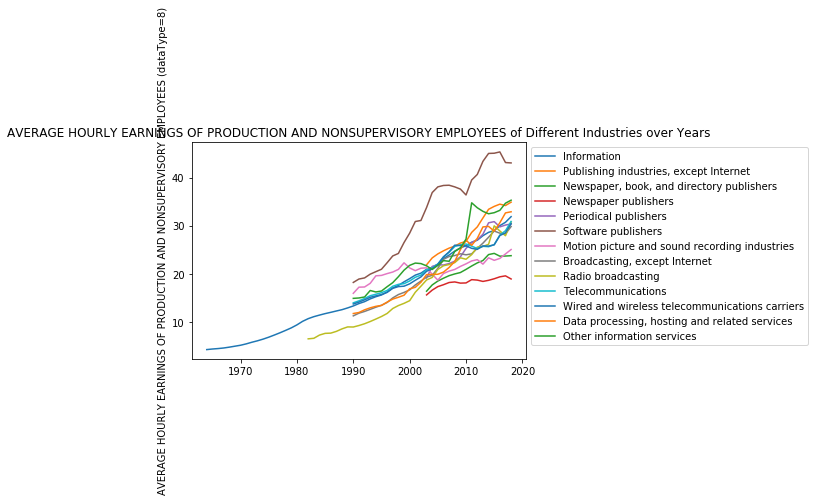

In [38]:
%matplotlib inline
show_datatype_over_year(
    load_ce('ce.data.50c.Information.ProductionEmployeeHoursAndEarnings'),
    8
)

What about **Manufacturing**...

datatype=8 is AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
There are 1 industies


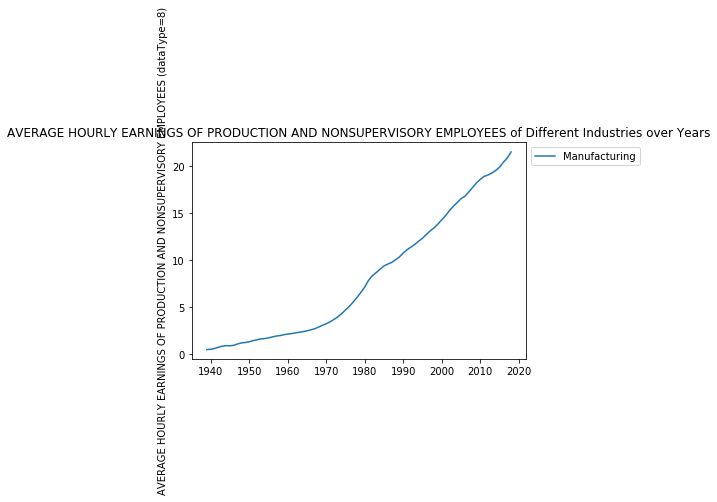

In [39]:
%matplotlib inline
show_datatype_over_year(
    load_ce('ce.data.30c.Manufacturing.ProductionEmployeeHoursAndEarnings'),
    8
)

datatype=8 is AVERAGE HOURLY EARNINGS OF PRODUCTION AND NONSUPERVISORY EMPLOYEES
There are 58 industies


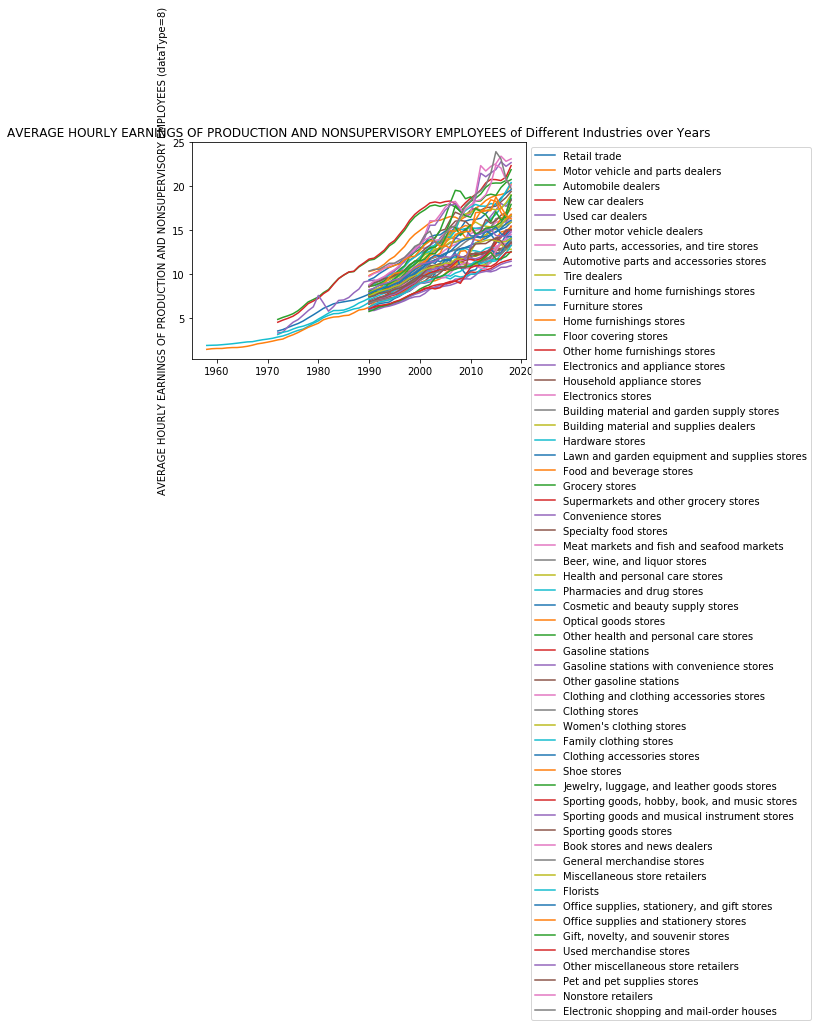

In [40]:
%matplotlib inline
show_datatype_over_year(
    load_ce('ce.data.42c.RetailTrade.ProductionEmployeeHoursAndEarnings'),
    8
)

Gain some big picture views ...

Let's find out **the top-10 industries that earn the most in the year 1980**

In [43]:
df_all = load_ce('ce.data.0.AllCESSeries')

In [44]:
df_all.count()

series_id         7694831
year              7694831
period            7694831
value             7694831
footnote_codes      27983
dtype: int64

In [45]:
_series_all = df_all.series_id.unique()
_industry_all = get_included_industries(_series_all)

In [46]:
_industry_all.count()

industry_code        902
naics_code           902
publishing_status    902
industry_name        902
display_level        902
selectable           902
sort_sequence        902
dtype: int64

In [47]:
# The top-10 industries that earn the most in the year 1980

# # Select the series that include the year 1980
# target_year = 1980
# series_1980 = _df_series[ (_df_series.begin_year <= target_year) & (target_year <= _df_series.end_year) ]

# Select datatype of 8 (i.e. Hourly earning of non-supervisory worker),
#     and select data series without Seasonal Adjusted (for the purpose 
#     of stat on year basis, I don't think Seasonal Adjustment matters.)
series_typed = _df_series[ (_df_series.data_type_code == 8) & (_df_series.seasonal == 'U') ]
series_typed.count()

series_id           532
supersector_code    532
industry_code       532
data_type_code      532
seasonal            532
series_title        532
footnote_codes        0
begin_year          532
begin_period        532
end_year            532
end_period          532
dtype: int64

In [48]:
# Helper function
def get_included_supersectors(series_ids):
    """
    Return list of supersector names
    """
    _df = pd.concat([get_meaning_series(i) for i in series_ids])
    return [get_meaning_supersector(i) for i in _df.supersector_code.unique()]

In [49]:
arr_s =  series_typed.series_id.unique()
# arr_industries_names = get_included_industries(arr_s).industry_name.to_list()
# arr_supersector_names = get_included_supersectors(arr_s)
target_year = 1980
df_value_yeared_typed = df_all[ df_all.series_id.isin(arr_s) & (df_all.year == target_year) ]
df_value_yeared_typed.head()

,series_id,year,period,value,footnote_codes
3707044,CEU0500000008,1980,M01,6.60,None
3707045,CEU0500000008,1980,M02,6.64,None
3707046,CEU0500000008,1980,M03,6.69,None
3707047,CEU0500000008,1980,M04,6.72,None
3707048,CEU0500000008,1980,M05,6.75,None


In [50]:
# Argumented the data with combined columns
df_agg_mean = df_value_yeared_typed.groupby('series_id').agg(['mean']).value
df_agg_mean.head()

,mean
series_id,
CEU0500000008,6.841538
CEU0600000008,7.662308
CEU0800000008,6.429231
CEU1000000008,8.963846
CEU1011330008,8.514615


In [51]:
df_agg_mean['industry_name'] = df_agg_mean.index.map(lambda s: get_included_industries([s]).industry_name.iloc[0])
df_agg_mean.head()

,mean,industry_name
series_id,,
CEU0500000008,6.841538,Total private
CEU0600000008,7.662308,Goods-producing
CEU0800000008,6.429231,Private service-providing
CEU1000000008,8.963846,Mining and logging
CEU1011330008,8.514615,Logging


In [52]:
df_agg_mean['supersector_name'] = df_agg_mean.index.map(lambda s: get_included_supersectors([s])[0])
df_agg_mean.head()

,mean,industry_name,supersector_name
series_id,,,
CEU0500000008,6.841538,Total private,Total private
CEU0600000008,7.662308,Goods-producing,Goods-producing
CEU0800000008,6.429231,Private service-providing,Private service-providing
CEU1000000008,8.963846,Mining and logging,Mining and logging
CEU1011330008,8.514615,Logging,Mining and logging


In [53]:
# Sort and got top-10
df_argm_sort = df_agg_mean.sort_values(by=['mean'], ascending=False)
df_argm_sort.head(10)

,mean,industry_name,supersector_name
series_id,,,
CEU3133637008,11.231538,Motor vehicle metal stamping,Durable Goods
CEU2023800008,10.186154,Specialty trade contractors,Construction
CEU4422000008,9.731538,Utilities,Utilities
CEU5000000008,9.473077,Information,Information
CEU4300000008,9.472308,Transportation and warehousing,Transportation and warehousing
CEU2000000008,9.362308,Construction,Construction
CEU1021000008,8.997692,Mining,Mining and logging
CEU1000000008,8.963846,Mining and logging,Mining and logging
CEU1011330008,8.514615,Logging,Mining and logging


In [54]:
# What about least ones?
df_argm_sort.tail()

,mean,industry_name,supersector_name
series_id,,,
CEU3231161508,4.361538,Poultry processing,Nondurable Goods
CEU7072100008,4.332308,Accommodation,Leisure and hospitality
CEU7072110008,4.330000,Traveler accommodation,Leisure and hospitality
CEU7000000008,3.981538,Leisure and hospitality,Leisure and hospitality
CEU6562430008,3.420000,Vocational rehabilitation services,Education and health services


I would like to see other year...

Wrap as a function:

In [55]:
def get_yearly_agg(target_year, datatype_code, from_series_df, aggregate_method='mean'):
    # Select datatype series
    series_typed = _df_series[ (_df_series.data_type_code == datatype_code) & (_df_series.seasonal == 'U') ]
    arr_s = series_typed.series_id.unique()
    
    # Select year and dataType
    df_value_yeared_typed = from_series_df[ 
        from_series_df.series_id.isin(arr_s)
        & (from_series_df.year == target_year)
    ]
    
    # Argumented the data with combined columns
    df_agg_mean = df_value_yeared_typed.groupby('series_id').agg([aggregate_method]).value
    df_agg_mean['industry_name'] = df_agg_mean.index.map(lambda s: get_included_industries([s]).industry_name.iloc[0])
    df_agg_mean['supersector_name'] = df_agg_mean.index.map(lambda s: get_included_supersectors([s])[0])
    # Sort and got top-10
    return df_agg_mean.sort_values(by=[aggregate_method], ascending=False)

Let's find out the year of 1994 (still Hourly salary average the year)!

In [56]:
get_yearly_agg(1994, datatype_code=8, from_series_df=df_all) \
    .head(10)

,mean,industry_name,supersector_name
series_id,,,
CEU6054151208,22.234615,Computer systems design services,Professional and business services
CEU3133610008,22.173846,Motor vehicles,Durable Goods
CEU6054151108,20.560000,Custom computer programming services,Professional and business services
CEU5051120008,20.497692,Software publishers,Information
CEU6054150008,20.361538,Computer systems design and related services,Professional and business services
CEU3133635008,20.272308,Motor vehicle power train components,Durable Goods
CEU6056192008,20.182308,Convention and trade show organizers,Professional and business services
CEU3232400008,19.961538,Petroleum and coal products,Nondurable Goods
CEU4422120008,19.686923,Natural gas distribution,Utilities


The year 1999 which is the one before the 2000 economy crisis?

In [57]:
get_yearly_agg(1999, datatype_code=8, from_series_df=df_all) \
    .head(10)

,mean,industry_name,supersector_name
series_id,,,
CEU6054151208,28.282308,Computer systems design services,Professional and business services
CEU5051120008,26.533077,Software publishers,Information
CEU6054151108,26.380000,Custom computer programming services,Professional and business services
CEU6054150008,26.167692,Computer systems design and related services,Professional and business services
CEU4422111008,23.423077,Electric power generation,Utilities
CEU3133610008,23.169231,Motor vehicles,Durable Goods
CEU4422111208,23.116923,Fossil fuel electric power generation,Utilities
CEU4142343008,22.876923,Computer and software,Wholesale trade
CEU6056192008,22.653077,Convention and trade show organizers,Professional and business services


Let's see the year of 2001

In [58]:
get_yearly_agg(2001, datatype_code=8, from_series_df=df_all) \
    .head(10)

,mean,industry_name,supersector_name
series_id,,,
CEU5051120008,30.919231,Software publishers,Information
CEU6054151208,30.079231,Computer systems design services,Professional and business services
CEU6054151108,28.894615,Custom computer programming services,Professional and business services
CEU6054150008,28.223077,Computer systems design and related services,Professional and business services
CEU4142343008,26.105385,Computer and software,Wholesale trade
CEU3133610008,25.740000,Motor vehicles,Durable Goods
CEU4422111008,24.978462,Electric power generation,Utilities
CEU4422111208,24.775385,Fossil fuel electric power generation,Utilities
CEU4422120008,24.370000,Natural gas distribution,Utilities


Hmm, what about emploment data?

In [59]:
# For employment data, I use datatype==06 (Production or nonsupervisory employees)
get_yearly_agg(1999, datatype_code=6, from_series_df=df_all, aggregate_method='sum') \
    .head(20)

,sum,industry_name,supersector_name
series_id,,,
CEU0500000006,1152416.0,Total private,Total private
CEU0800000006,917545.0,Private service-providing,Private service-providing
CEU4000000006,280103.0,"Trade, transportation, and utilities","Trade, transportation, and utilities"
CEU0600000006,234871.0,Goods-producing,Goods-producing
CEU6500000006,171817.0,Education and health services,Education and health services
CEU6000000006,171778.0,Professional and business services,Professional and business services
CEU4200000006,166068.0,Retail trade,Retail trade
CEU3000000006,162810.0,Manufacturing,Manufacturing
CEU6562000006,145506.7,Health care and social assistance,Education and health services


In [60]:
get_yearly_agg(2001, datatype_code=6, from_series_df=df_all, aggregate_method='sum') \
    .head(20)

,sum,industry_name,supersector_name
series_id,,,
CEU0500000006,1172781.0,Total private,Total private
CEU0800000006,945722.0,Private service-providing,Private service-providing
CEU4000000006,281830.0,"Trade, transportation, and utilities","Trade, transportation, and utilities"
CEU0600000006,227059.0,Goods-producing,Goods-producing
CEU6500000006,181975.0,Education and health services,Education and health services
CEU6000000006,177019.0,Professional and business services,Professional and business services
CEU4200000006,168418.4,Retail trade,Retail trade
CEU6562000006,153505.5,Health care and social assistance,Education and health services
CEU3000000006,151799.0,Manufacturing,Manufacturing


In [61]:
# What about present days
get_yearly_agg(2018, datatype_code=6, from_series_df=df_all, aggregate_method='sum') \
    .head(20)

,sum,industry_name,supersector_name
series_id,,,
CEU0500000006,1356151.0,Total private,Total private
CEU0800000006,1162708.0,Private service-providing,Private service-providing
CEU4000000006,304108.0,"Trade, transportation, and utilities","Trade, transportation, and utilities"
CEU6500000006,270241.0,Education and health services,Education and health services
CEU6562000006,228794.0,Health care and social assistance,Education and health services
CEU6000000006,222596.0,Professional and business services,Professional and business services
CEU0600000006,193443.0,Goods-producing,Goods-producing
CEU7000000006,186960.0,Leisure and hospitality,Leisure and hospitality
CEU6562000106,183575.0,Health care,Education and health services


In [62]:
get_yearly_agg(2018, datatype_code=8, from_series_df=df_all, aggregate_method='median') \
    .head(20)

,median,industry_name,supersector_name
series_id,,,
CEU5552413008,45.99,Reinsurance carriers,Financial activities
CEU5552392008,45.81,Portfolio management,Financial activities
CEU6054151108,43.89,Custom computer programming services,Professional and business services
CEU6054150008,43.00,Computer systems design and related services,Professional and business services
CEU5051120008,42.98,Software publishers,Information
CEU6054151208,42.71,Computer systems design services,Professional and business services
CEU6054171508,42.68,"Research and development in the physical, engi...",Professional and business services
CEU4422111208,42.45,Fossil fuel electric power generation,Utilities
CEU4348600008,40.97,Pipeline transportation,Transportation and warehousing


In [63]:
get_yearly_agg(2018, datatype_code=8, from_series_df=df_all, aggregate_method='median') \
    .tail()

,median,industry_name,supersector_name
series_id,,,
CEU4244700008,11.64,Gasoline stations,Retail trade
CEU4244711008,11.45,Gasoline stations with convenience stores,Retail trade
CEU7072251308,11.08,Limited-service restaurants,Leisure and hospitality
CEU4244512008,10.86,Convenience stores,Retail trade
CEU7072251408,10.82,"Cafeterias, grill buffets, and buffets",Leisure and hospitality


## 5. Explore More Visualization

Try some experiments with Plotly.

### 5.1 Monthly Employment Visualization

In [71]:
# From the year 2008-2018, monthly employment visualization

# Select 5 industies interested:
arr_seriesid = [
    'CEU4000000006',
    'CEU6500000006',
    'CEU6562000006',
    'CEU6000000006',
    'CEU0600000006'
]

industried_5 = get_included_industries(arr_seriesid).industry_code.to_list()
industried_5

[40000000, 65000000, 65620000, 60000000, 6000000]

In [78]:
# Select datatype series
# Data type used: Production or nonsupervisory employees (06)                              
series_typed = _df_series[ 
    (_df_series.data_type_code == 6) 
    & (_df_series.seasonal == 'U') 
    & (_df_series.industry_code.isin(industried_5) )
]

arr_s = series_typed.series_id.unique()

# Select year and dataType
df_value_yeared_typed = df_all[ 
    df_all.series_id.isin(arr_s)
    & (df_all.year >= 2008)
    & (df_all.year <= 2018)
]

# Aggregated by month
df_agg = df_value_yeared_typed.groupby(['series_id', 'period']).agg(['sum']).value
df_agg.head(24)

sum
series_id     period          
CEU0600000006 M01     148802.0
              M02     148582.0
              M03     149650.0
              M04     151550.0
              M05     153531.0
              M06     155795.0
              M07     156257.0
              M08     156863.0
              M09     155987.0
              M10     155565.0
              M11     154181.0
              M12     151790.0
              M13     153214.0
CEU4000000006 M01     240805.0
              M02     238524.0
              M03     239343.0
              M04     240369.0
              M05     242102.0
              M06     243426.0
              M07     243014.0
              M08     242920.0
              M09     242145.0
              M10     243773.0
              M11     248422.0

In [111]:
df_agg.index.get_level_values(0)
df_agg.loc['CEU4000000006']['sum']

period
M01    240805.0
M02    238524.0
M03    239343.0
M04    240369.0
M05    242102.0
M06    243426.0
M07    243014.0
M08    242920.0
M09    242145.0
M10    243773.0
M11    248422.0
M12    250480.0
M13    242944.0
Name: sum, dtype: float64

In [136]:
# pd.DataFrame({
#     'CEU4000000006':df_agg.loc['CEU4000000006']['sum'], 
#     'CEU0600000006':df_agg.loc['CEU0600000006']['sum']
# })

# pd.DataFrame([df_agg.loc['CEU4000000006']['sum'], df_agg.loc['CEU4000000006']['sum']-df_agg.loc['CEU4000000006']['sum'].mean()])

In [134]:
# df_agg_monthly_percentage = df_value_yeared_typed.groupby(['period', 'series_id']).agg(['sum']).value
# df_agg_monthly_percentage

In [133]:
# arr = []
# for m in df_agg_monthly_percentage.index.get_level_values(0).unique():
#     arr.append((df_agg_monthly_percentage.loc[m] / df_agg_monthly_percentage.loc[m].sum()).sum)
# arr

In [177]:
month_text = ['Jan', 'Feb', 'Mar', 'Apr', 'Mar', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['rgb(106,81,163)', 'rgb(158,154,200)', 'rgb(203,201,226)', 'rgb(242,240,247)', 'rgb(242,255,247)']

import plotly.graph_objects as go

fig = go.Figure()

for series, c in zip(df_agg.index.get_level_values(0).unique(), colors):
    # print(series)
    df_month = df_agg.loc[series]['sum']
    
    fig.add_trace(go.Barpolar(
        #r=df_month.to_list(),
        r=(df_month - df_month.median()).to_list()[:12],
        theta=month_text,
        name=get_included_industries([series]).industry_name.iloc[0],
        marker_color=c
    ))


fig.update_traces(text=month_text)
fig.update_layout(
    title='2008-2018 Monthly Employment on Five Industries',
    font_size=16,
    legend_font_size=16,
    polar = dict(
        radialaxis_angle = 90,
        angularaxis = dict(
            direction = "clockwise",
        ),
    )
)
fig.show()

### 5.2 Employment Growth over Years

In [233]:
# Select 5 industies interested:
arr_seriesid = [
    'CEU4000000006',
    'CEU6500000006',
    'CEU6562000006',
    'CEU6000000006',
    'CEU0600000006'
]

industried_5 = get_included_industries(arr_seriesid).industry_code.to_list()

# Select datatype series
# Data type used: Production or nonsupervisory employees (06)                              
series_typed = _df_series[ 
    (_df_series.data_type_code == 6) 
    & (_df_series.seasonal == 'U') 
    & (_df_series.industry_code.isin(industried_5) )
]

arr_s = series_typed.series_id.unique()

# Select year and dataType
df_value_yeared_typed = df_all[ 
    df_all.series_id.isin(arr_s)
    & (df_all.year >= 1998)
    & (df_all.year <= 2018)
]

# Aggregated by month
df_agg = df_value_yeared_typed.groupby(['series_id', 'year']).agg(['sum']).value
df_agg

sum
series_id     year          
CEU0600000006 1998  234107.0
              1999  234871.0
              2000  236196.0
              2001  227059.0
              2002  213200.0
              2003  204515.0
              2004  205669.0
              2005  209880.0
              2006  215264.0
              2007  213263.0
              2008  204409.0
              2009  174186.0
              2010  166063.0
              2011  169064.0
              2012  172732.0
              2013  175248.0
              2014  180152.0
              2015  183832.0
              2016  184792.0
              2017  187846.0
              2018  193443.0
CEU4000000006 1998  273387.0
              1999  280103.0
              2000  285154.0
              2001  281830.0
              2002  276987.0
              2003  273589.0
              2004  276693.0
              2005  283301.0
              2006  287634.0
...                      ...
CEU6500000006 2010  227897.0
              2011  231630.0
              2012  236990.0
              2013  240559.0
              2014  244747.0
              2015  251376.0
              2016  258163.0
              2017  264741.0
              2018  270241.0
CEU6562000006 1998  142392.3
              1999  145506.7
              2000  148274.1
              2001  153505.5
              2002  158408.7
              2003  161705.6
              2004  164724.2
              2005  168961.3
              2006  173763.2
              2007  179505.2
              2008  185134.0
              2009  189709.2
              2010  192780.6
              2011  195453.9
              2012  199768.4
              2013  203132.6
              2014  206589.5
              2015  212601.6
              2016  218382.3
              2017  223942.3
              2018  228794.0

[105 rows x 1 columns]

In [234]:
# Try a bar chart
import plotly.graph_objects as go

arr_year = df_agg.index.get_level_values(1).unique()


data = []
for series in df_agg.index.get_level_values(0).unique():
    industry_name = get_included_industries([series]).industry_name.iloc[0]
    data.append(
        go.Bar(name=industry_name, x=arr_year, y=df_agg.loc[series]['sum'])
    )

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(
    barmode='group',
    title='1998-2018 U.S. Employment on Five Industries',
)

fig.show()

I wonder if I visualized the **growth rate** would have more... insights.

In [238]:
# Still a bar chart, but this time we visualize the growth rate
import plotly.graph_objects as go

arr_year = df_agg.index.get_level_values(1).unique()


data = []
for series in df_agg.index.get_level_values(0).unique():
    industry_name = get_included_industries([series]).industry_name.iloc[0]
    data.append(
        go.Bar(name=industry_name, x=arr_year, y=df_agg.loc[series]['sum'].pct_change())
    )

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(
    barmode='group',
    title='1998-2018 U.S. Employment Growth Rate on Five Industries',
)

fig.show()

### 5.3 Hourly Earning 

Data type: Average hourly earnings for all employees (03)

In [225]:
# Select 5 industies interested:
arr_seriesid = [
    'CEU4000000006',
    'CEU6500000006',
    'CEU6562000006',
    'CEU6000000006',
    'CEU0600000006'
]

industried_5 = get_included_industries(arr_seriesid).industry_code.to_list()

# Select datatype series
# Data type used: Average hourly earnings for all employees (03)                       
series_typed = _df_series[ 
    (_df_series.data_type_code == 3) 
    & (_df_series.seasonal == 'U') 
    & (_df_series.industry_code.isin(industried_5) )
]

arr_s = series_typed.series_id.unique()

# Select year and dataType
df_value_yeared_typed = df_all[ 
    df_all.series_id.isin(arr_s)
    & (df_all.year >= 1998)
    & (df_all.year <= 2018)
]

# Aggregated by month
df_agg = df_value_yeared_typed.groupby(['series_id', 'year']).agg(['median']).value

# Try a bar chart
arr_year = df_agg.index.get_level_values(1).unique()

data = []
for series in df_agg.index.get_level_values(0).unique():
    industry_name = get_included_industries([series]).industry_name.iloc[0]
    data.append(
        go.Bar(name=industry_name, x=arr_year, y=df_agg.loc[series]['median'])
    )

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(
    barmode='group',
    title='2006-2018 U.S. Hourly Wage on Five Industries',
)

fig.show()

For all industries visualized, looks like wage are all growing... **Hardly tell anything interesting**. Again, what about growth rate?

In [230]:
data = []
for series in df_agg.index.get_level_values(0).unique():
    industry_name = get_included_industries([series]).industry_name.iloc[0]
    data.append(
        go.Bar(name=industry_name, x=arr_year, y=df_agg.loc[series]['median'].pct_change())
    )

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(
    barmode='group',
    title='1998-2018 U.S. Hourly Wage Growth Rate on Five Industries',
)

fig.show()

## 6. For the Purpose of INFSCI 2415 Assignment 1

So far, I do find some interesting insights on the dataset I've been exploring.

Having a general overview of some aspects of the CE dataset (e.g. Hourly wage, 
employment of non-supervisory worker on different industries, supersectors, 
and aggregated yearly and monthly), for the purpose of the _Assignment 1_ of 
**INFSCI 2415 Information Visualization**, I decided to go for the employment data.

### 6.1 Selection of the Interested Industries

Firstly, I will choose some industries for the demo. 

I gonna use the `get_yearly_agg()` function I created earlier, to show all industries, sorted descendently, in the present date the year of 2018, employees (non-supervisory) hourly earnings.

In [247]:
# datatype==8 is Average hourly earnings for production employees
df_2018 = get_yearly_agg(2018, datatype_code=8, from_series_df=df_all, aggregate_method='median')

# show the top 20
df_2018.head(20)

,median,industry_name,supersector_name
series_id,,,
CEU5552413008,45.99,Reinsurance carriers,Financial activities
CEU5552392008,45.81,Portfolio management,Financial activities
CEU6054151108,43.89,Custom computer programming services,Professional and business services
CEU6054150008,43.00,Computer systems design and related services,Professional and business services
CEU5051120008,42.98,Software publishers,Information
CEU6054151208,42.71,Computer systems design services,Professional and business services
CEU6054171508,42.68,"Research and development in the physical, engi...",Professional and business services
CEU4422111208,42.45,Fossil fuel electric power generation,Utilities
CEU4348600008,40.97,Pipeline transportation,Transportation and warehousing


In [243]:
# ... And maybe the least 10
df_2018.tail(10)

,median,industry_name,supersector_name
series_id,,,
CEU4245330008,12.42,Used merchandise stores,Retail trade
CEU8081231008,12.36,Coin-operated laundries and drycleaners,Other services
CEU8081232008,12.34,"Drycleaning and laundry services, except coin-...",Other services
CEU7072251508,12.24,Snack and nonalcoholic beverage bars,Leisure and hospitality
CEU7071395008,11.95,Bowling centers,Leisure and hospitality
CEU4244700008,11.64,Gasoline stations,Retail trade
CEU4244711008,11.45,Gasoline stations with convenience stores,Retail trade
CEU7072251308,11.08,Limited-service restaurants,Leisure and hospitality
CEU4244512008,10.86,Convenience stores,Retail trade


I will reuse some code from last section, to show the employment growth rate over years

In [269]:
# Select 5 industies (seriesid) interested:
arr_seriesid = [
    'CEU5552392008',
    'CEU0600000006',
    'CEU6054150008',
    'CEU7071395008',
    'CEU4244700008',
    'CEU6500000008'
]

industried_5 = get_included_industries(arr_seriesid).industry_code.to_list()

# Select datatype series
# Data type used: Average hourly earnings for all employees (03)                       
series_typed = _df_series[ 
    (_df_series.data_type_code == 3) 
    & (_df_series.seasonal == 'U') 
    & (_df_series.industry_code.isin(industried_5) )
]

arr_s = series_typed.series_id.unique()

# Select year and dataType
df_value_yeared_typed = df_all[ 
    df_all.series_id.isin(arr_s)
    & (df_all.year >= 1998)
    & (df_all.year <= 2018)
]

# Aggregated by month
df_agg = df_value_yeared_typed.groupby(['series_id', 'year']).agg(['median']).value

# Try a bar chart
arr_year = df_agg.index.get_level_values(1).unique()

data = []
for series in df_agg.index.get_level_values(0).unique():
    industry_name = get_included_industries([series]).industry_name.iloc[0]
    data.append(
        go.Bar(name=industry_name, x=arr_year, y=df_agg.loc[series]['median'])
    )

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(
    barmode='group',
    title='2006-2018 U.S. Hourly Wage on Five Industries',
)

fig.show()

The plot shows weekly wage of six different industries over year. 

Just to give a sense that these industries are in different paid levels.

### 6.2 Visualize the Growth of the Employment

Again, reuse of my code from previous section.

In [270]:
# Select datatype series
# Data type used: Production or nonsupervisory employees (06)               
series_typed = _df_series[ 
    (_df_series.data_type_code == 6) 
    & (_df_series.seasonal == 'U') 
    & (_df_series.industry_code.isin(industried_5) )
]

arr_s = series_typed.series_id.unique()

# Select year and dataType
df_value_yeared_typed = df_all[ 
    df_all.series_id.isin(arr_s)
    & (df_all.year >= 1998)
    & (df_all.year <= 2018)
]

# Aggregated by month
df_agg = df_value_yeared_typed.groupby(['series_id', 'year']).agg(['median']).value

# Try a bar chart
arr_year = df_agg.index.get_level_values(1).unique()

data = []
for series in df_agg.index.get_level_values(0).unique():
    industry_name = get_included_industries([series]).industry_name.iloc[0]
    data.append(
        go.Bar(name=industry_name, x=arr_year, y=df_agg.loc[series]['median'].pct_change())
    )

fig = go.Figure(data=data)
# Change the bar mode
fig.update_layout(
    barmode='group',
    title='1998-2018 U.S. Non-Supervisory Employment Growth Rate on Six Industries',
)

fig.show()

The plot is too messy too see things clearly...

Let me try filled area plot.

### 6.3 Make Area Plots

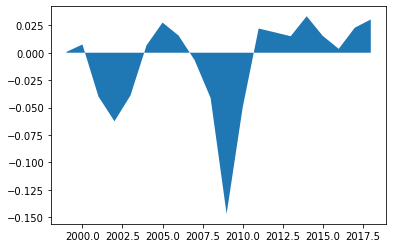

In [295]:
import matplotlib.pyplot as plt

x = arr_year
y = df_agg.loc['CEU0600000006']['median'].pct_change()
plt.fill_between(x, 0, y)
plt.show()

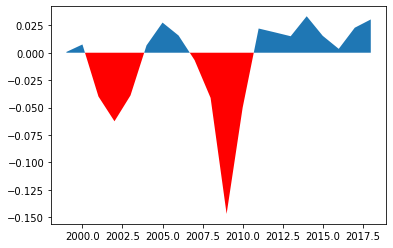

In [369]:
x = arr_year
y = df_agg.loc['CEU0600000006']['median'].pct_change()
plt.fill_between(x, 0, y, where=(y >= 0), interpolate=True)
plt.fill_between(x, 0, y, where=(y < 0), facecolor='red', interpolate=True)
plt.show()

Works but looks ugly...

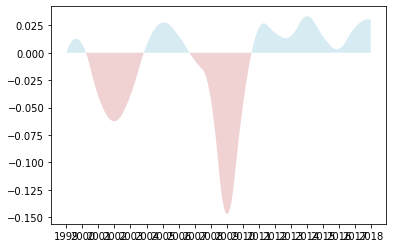

In [370]:
x = arr_year[1:]
y = df_agg.loc['CEU0600000006']['median'].pct_change().to_list()[1:]

# Make it smooth
from scipy.interpolate import interp1d
x_smooth = np.linspace(x.min(), x.max(), 500)
f = interp1d(x, y, kind='quadratic')
y = f(x_smooth)

plt.fill_between(x_smooth, 0, y, where=(y >= 0), facecolor='#d7ebf2', interpolate=True)
plt.fill_between(x_smooth, 0, y, where=(y < 0), facecolor='#f1d2d3', interpolate=True)

plt.xticks(x)
plt.show()

Draw multiple industries together --

### 6.4 Polish the Plots (Completed Section for Assignment 1)

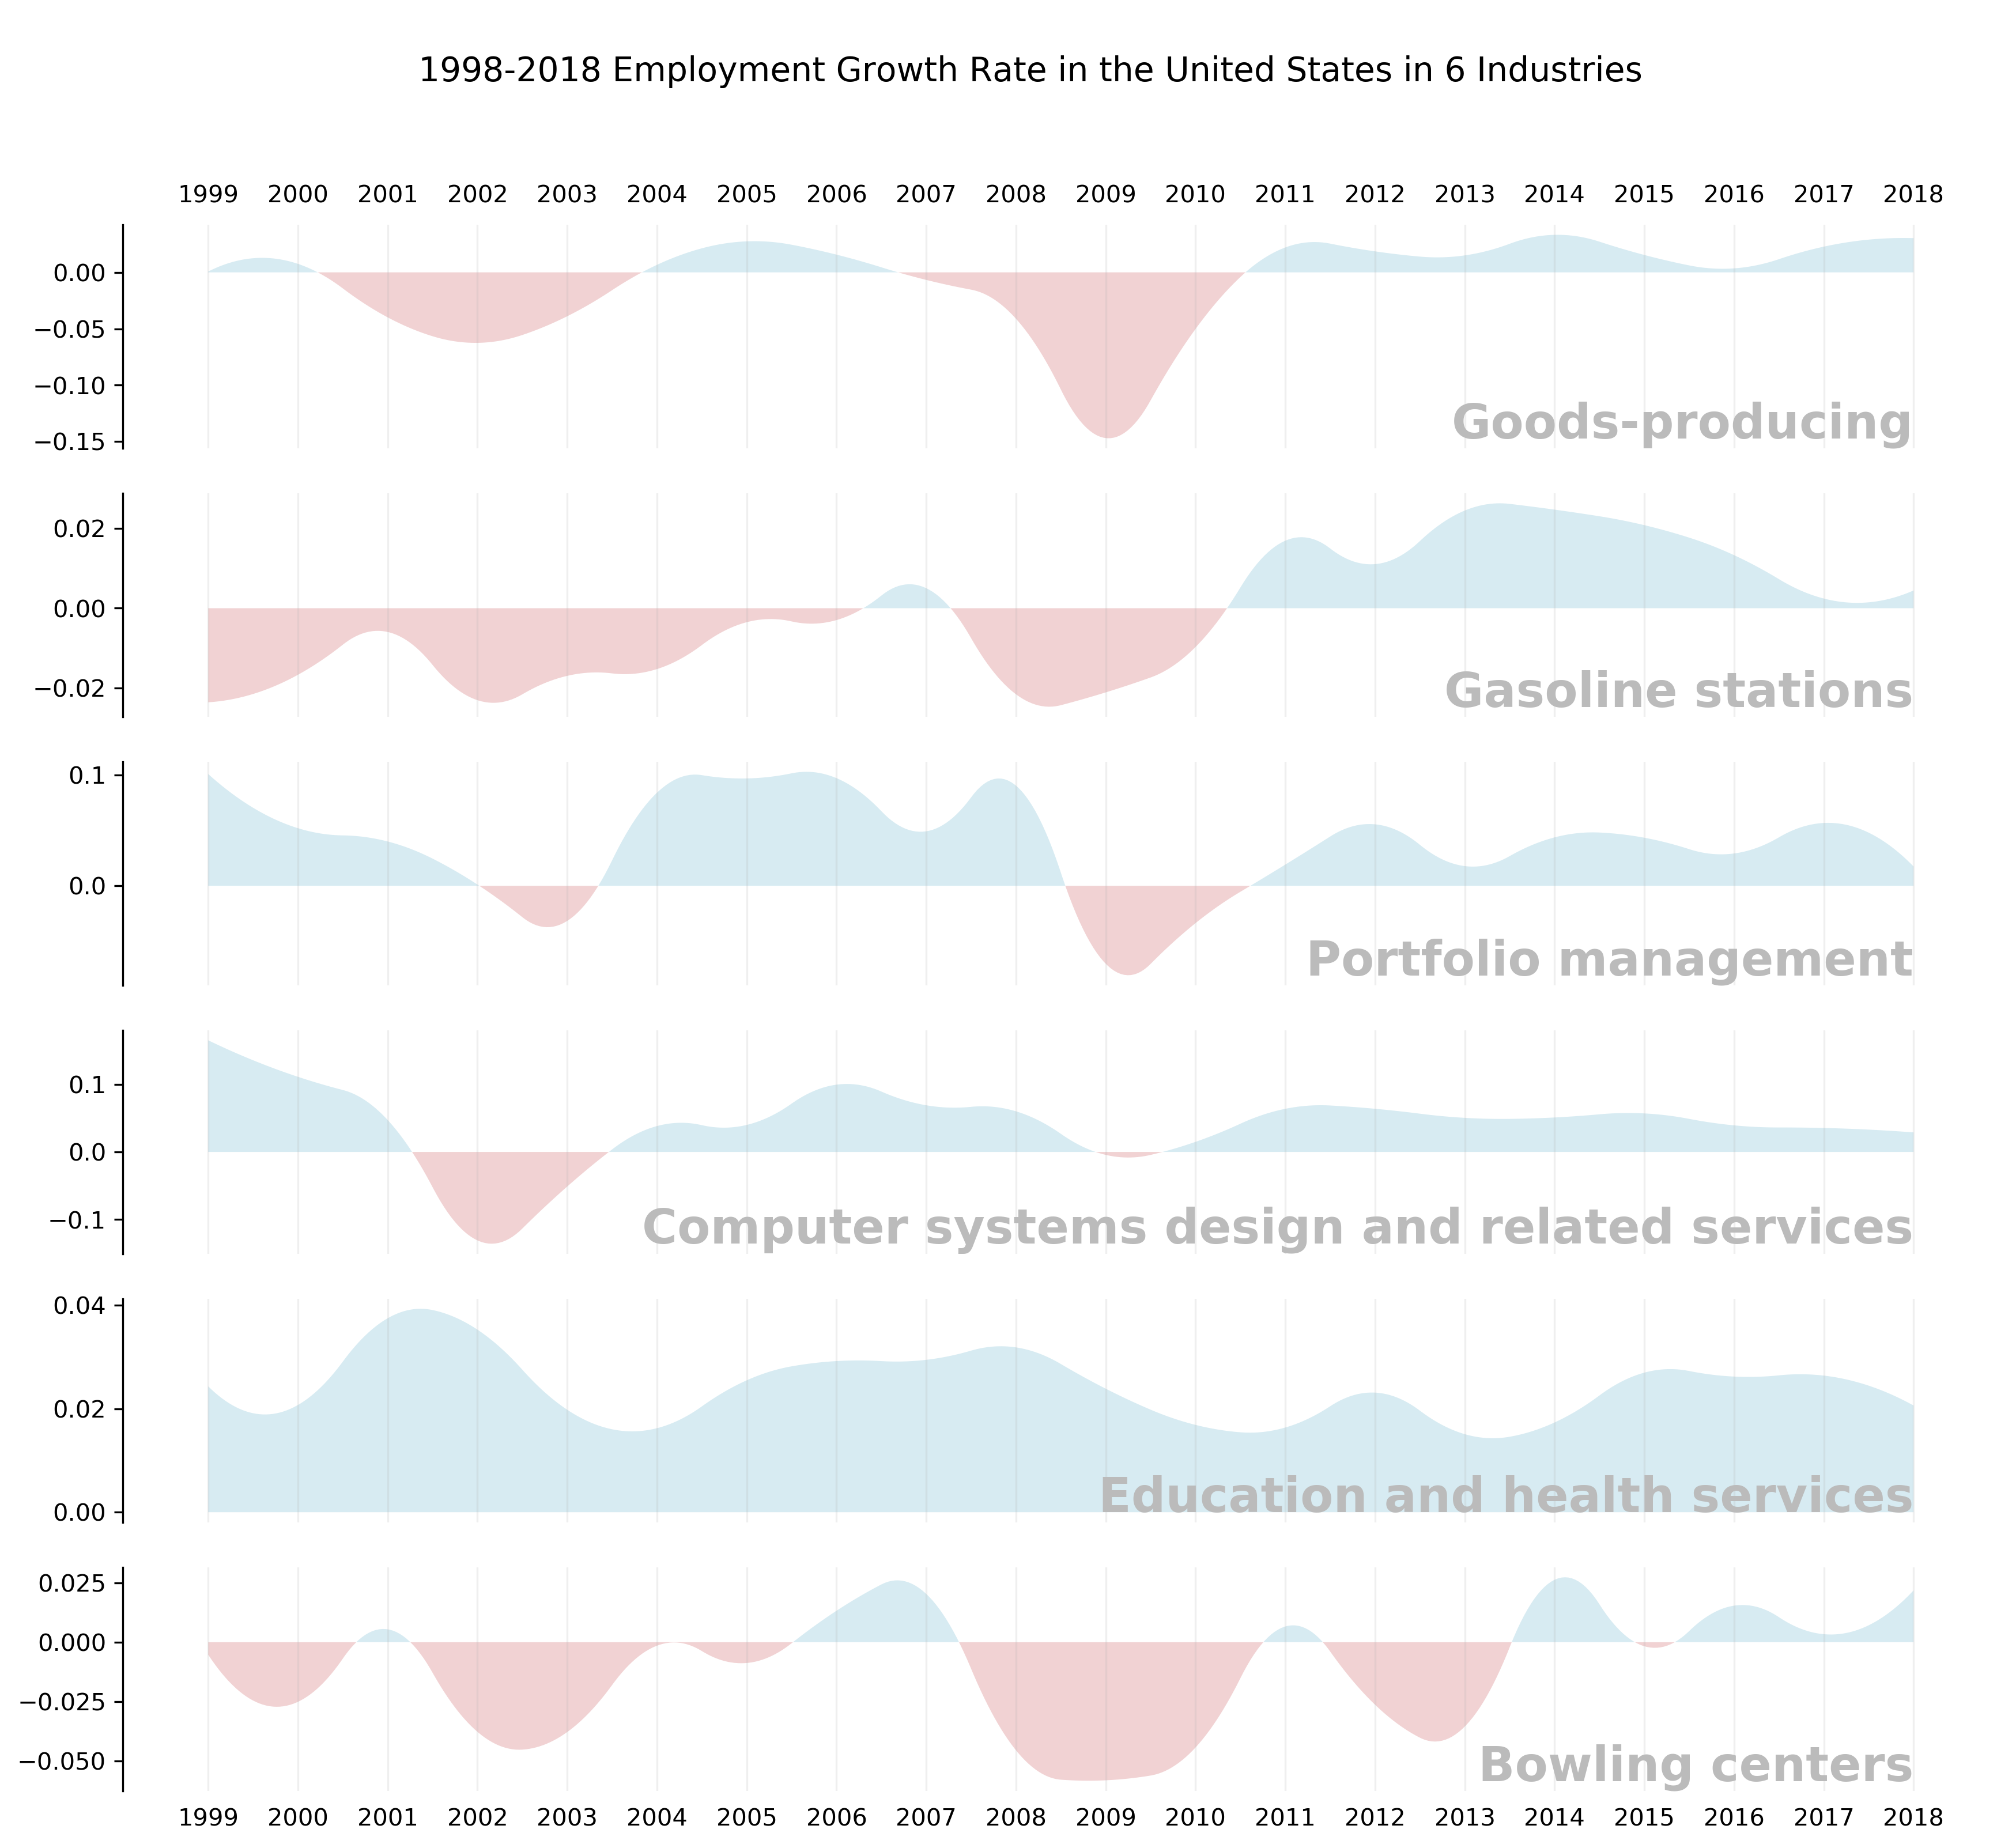

In [405]:
from scipy.interpolate import interp1d

arr_ax = []
fig, arr_ax = plt.subplots(
    6, 1, 
    sharex=True, 
    figsize=(14, 12), dpi=300, 
    facecolor='w', edgecolor='k'
)

for ax, seriesid in zip(arr_ax, df_agg.index.get_level_values(0).unique()):
    
    industry_name = get_included_industries([seriesid]).industry_name.iloc[0]
    x = arr_year[1:]
    y1 = df_agg.loc[seriesid]['median'].pct_change().to_list()[1:]

    # Make data smooth
    xs = np.linspace(x.min(), x.max(), 500)
    f = interp1d(x, y1, kind='quadratic')
    ys = f(x_smooth)
    
    # Fill the area colors
    ax.fill_between(xs, 0, ys, where=(ys >= 0), facecolor='#d7ebf2', interpolate=True)
    ax.fill_between(xs, 0, ys, where=(ys < 0), facecolor='#f1d2d3', interpolate=True)
    
    # Set the x label, make it fancy
    #ax.set_xlabel(industry_name, horizontalalignment='left', x=0.01)
    ax.text(
        2018, min(0, ys.min()), 
        industry_name, 
        fontsize=20, color='#bbbbbb', fontweight='bold', horizontalalignment='right',
    )
    
    # No show the tick on x
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    # ax.xaxis.set_label_coords(1.05, -0.025)
    
    # No frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    ax.xaxis.grid(alpha=0.2)
    
# Add year tick on bottom and top
arr_ax[-1].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
arr_ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labeltop=True) # labels along the bottom edge are off

plt.xticks(x)
fig.suptitle("\n1998-2018 Employment Growth Rate in the United States in 6 Industries", fontsize=14)
plt.show()

**Comment on my visulization**: 

The 6 selected industries ( _i.e. 'Goods-producing',
 'Gasoline stations',
 'Portfolio management',
 'Computer systems design and related services',
 'Education and health services',
 'Bowling centers'_ ) 
 shows diversed pattern in employment growth rate over the years, where the X-axis are the year from 1999 to 2018 
 (1999 means the the period of 1998-1999), and the Y-axis are the growth rate to the previous year in percentage.
 The data is collected monthly, on non-supervisory employeers (production workers).
 
Worth mentioned that the year 2000 and the year 2008 cause signanificance negative employment rate on most industries, which, by I assumption, has great correlation to the 
[2000 Dot-com Bubble](https://en.wikipedia.org/wiki/Dot-com_bubble) 
and the [Financial crisis of 2007–2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008). 
During such periods, only the _Education and health services_ remain positive growth, and many other industries
in varies in different supersectors drops their employment.

And it can also be observed that the _Computer systems design and related services_ and 
_Education and health services_ has better resistance against the 2018 Financial crisis.

Dataset: 
> **National Employment, Hours, and Earnings** [(link to Kaggle)](https://www.kaggle.com/bls/employment#ce.series.csv) provided by _Current Employment Statistics (CES).

In [286]:
# df_agg.index.get_level_values(0).unique()

Index(['CEU0600000006', 'CEU4244700006', 'CEU5552392006', 'CEU6054150006',
       'CEU6500000006', 'CEU7071395006'],
      dtype='object', name='series_id')

In [403]:
# get_included_industries(df_agg.index.get_level_values(0).unique()).industry_name.to_list()

['Goods-producing',
 'Gasoline stations',
 'Portfolio management',
 'Computer systems design and related services',
 'Education and health services',
 'Bowling centers']